# Table of Contents: <a class="anchor" id="top"></a>
* [Introduction](#intro)
* [Read The Data](#readdata)
* [Feature Engineering Part I - Handling Missing Values](#misvalues)
* [Feature Engineering Part II - Dictionary](#dictio)
* [Feature Engineering Part III - Reformatting](#reform)
* [Answering The Questions](#ans)
    * [Is there any relationship between who a person works for and their performance score?](#question1)
    * [What is the overall diversity profile of the organization?](#question2)
    * [Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?](#question3)
    * [Are there areas of the company where pay is not equitable?](#question4)
    * [What are our best recruiting sources if we want to ensure a diverse organization](#question5)

# Introduction <a class="anchor" id="intro"></a>
Hi Everyone! Today I'll demonstrate my workflow to analyze a **Kaggle** dataset called `Human Resources`. Read more about it [here.](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)

The table of contents provide an outline to what we're going from start to finish, and the questions answered in this notebook are also in the table of contents.

# Read The Data <a class="anchor" id="readdata"></a>
We begin by grabbing the data and import the necessary libraries. You can grab the data locally, from kaggle, or use the existing link as I've uploaded the csv into my github repo.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_original = pd.read_csv("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Predictions/Data/HRDataset_v14.csv")
data_original.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Feature Engineering Part I - Handling Missing Values <a class="anchor" id="misvalues"></a>
As of the information from `data_original.info()` above, we can see that out of 311 rows of data, column `ManagerID` and `DateofTermination` has missing values. We will try to analyze and handle them.

[Back To Top](#top)

## Missing Values in ManagerName

In [4]:
# Copy the data dataframe as df
df = data_original.copy()

In [5]:
# Give a brief view of ManagerID where it has Null / NaN values.
df[df['ManagerID'].isna()].head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4


It turns out that the ManagerName is shown as `Webster Butler`. One can wonder if the name `Webster Butler` is only showing for the NaN Values or not. To prove this true or not, we can display the `ManagerID` where the `ManagerName` is containing `Webster Butler`.

In [6]:
# Show All ManagerID where ManagerName is Webster Butler
df[df['ManagerName'] == 'Webster Butler']['ManagerID'].unique()

array([39., nan])

Okay, so apparently `Webster Butler` definitely has Null / NaN Values. But we can try to reverse this code.

In [7]:
# Show all ManagerName where ManagerID is NaN / Null
df[df['ManagerID'].isna()]['ManagerName'].unique()

array(['Webster Butler'], dtype=object)

And there it is. The NaN / Null values are only present where `ManagerName` is `Webster Butler`. Now we fill those values as the already existing number for `Webster Butler`, 39.

In [8]:
# Fill every NaN / Null with 39
df['ManagerID'].fillna(39, inplace=True)

In [9]:
# Optional Check if Webster Butler still has NaN / Null values
df[df['ManagerName'] == 'Webster Butler']['ManagerID'].unique()

array([39.])

## Missing values in DateofTermination
As common knowledge, most employees in the company is still present, and only a handful or a percentage of people that have left the company, has `DateofTermination` value.

There are many ways to handle this, but in this workflow, I decided to take a look at `TermReason` column. Why? Because that column specifies why employees are terminated / resigned, but it doesn't have any NaN / Null values.

In [10]:
# Show unique values in TermReason
df['TermReason'].unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'no-call, no-show', 'Fatal attraction',
       'maternity leave - did not return', 'medical issues',
       'gross misconduct'], dtype=object)

As you can see, the value `N/A-StillEmployed` exists for people that are still working for the company. We can and will use this information, and purposefully discard the `DateofTermination` column.

In [11]:
# Drop column
df = df.drop(['DateofTermination'], axis=1)

# Feature Engineering Part II - Dictionary <a class="anchor" id="dictio"></a>
For this part, I would like to store information in dictionaries for contextual purposes. Because the values will be encoded later, I would like to know what the encoded values were, as textual data (retaining information).

[Back To Top](#top)

Some columns are assumed already providing encoded values, such as `GenderID` for `Sex`, `DeptID` for `Department`, and so on. But, we will need to analyze it further.

In [12]:
# Column Mapping
def column_mapping(dataframe, column1, column2):
    column_mapping = {}

    for unique_value in dataframe[column1].unique():
        unique_values_column2 = dataframe.loc[dataframe[column1] == unique_value, column2].unique()
        column_mapping[unique_value] = unique_values_column2

    return column_mapping

In [13]:
column_mapping(df, 'Employee_Name', 'EmpID')

{'Adinolfi, Wilson  K': array([10026], dtype=int64),
 'Ait Sidi, Karthikeyan   ': array([10084], dtype=int64),
 'Akinkuolie, Sarah': array([10196], dtype=int64),
 'Alagbe,Trina': array([10088], dtype=int64),
 'Anderson, Carol ': array([10069], dtype=int64),
 'Anderson, Linda  ': array([10002], dtype=int64),
 'Andreola, Colby': array([10194], dtype=int64),
 'Athwal, Sam': array([10062], dtype=int64),
 'Bachiochi, Linda': array([10114], dtype=int64),
 'Bacong, Alejandro ': array([10250], dtype=int64),
 'Baczenski, Rachael  ': array([10252], dtype=int64),
 'Barbara, Thomas': array([10242], dtype=int64),
 'Barbossa, Hector': array([10012], dtype=int64),
 'Barone, Francesco  A': array([10265], dtype=int64),
 'Barton, Nader': array([10066], dtype=int64),
 'Bates, Norman': array([10061], dtype=int64),
 'Beak, Kimberly  ': array([10023], dtype=int64),
 'Beatrice, Courtney ': array([10055], dtype=int64),
 'Becker, Renee': array([10245], dtype=int64),
 'Becker, Scott': array([10277], dtype=int64

Based on the results above, there are no apparent duplicate values of `Emp_ID`, as 1 `Employee_Name` represents 1 `Emp_ID`.

In [14]:
# Position Info in dict
column_mapping(df, 'Position', 'PositionID')

{'Production Technician I': array([19], dtype=int64),
 'Sr. DBA': array([27], dtype=int64),
 'Production Technician II': array([20], dtype=int64),
 'Software Engineer': array([24, 23], dtype=int64),
 'IT Support': array([14], dtype=int64),
 'Data Analyst': array([9], dtype=int64),
 'Database Administrator': array([8], dtype=int64),
 'Enterprise Architect': array([30], dtype=int64),
 'Sr. Accountant': array([26], dtype=int64),
 'Production Manager': array([18, 17], dtype=int64),
 'Accountant I': array([1], dtype=int64),
 'Area Sales Manager': array([3], dtype=int64),
 'Software Engineering Manager': array([25], dtype=int64),
 'BI Director': array([5], dtype=int64),
 'Director of Operations': array([10], dtype=int64),
 'Sr. Network Engineer': array([28], dtype=int64),
 'Sales Manager': array([21], dtype=int64),
 'BI Developer': array([4], dtype=int64),
 'IT Manager - Support': array([13], dtype=int64),
 'Network Engineer': array([15], dtype=int64),
 'IT Director': array([12], dtype=int64

It appears that some Positions has multiple IDs, such as `Production Manager` and `Software Engineer`. Knowing this, I will go forward to encode the column `Position` into numerical values, and in turn deleting the column `PositionID`.

In [15]:
# Drop PositionID Column
df = df.drop(['PositionID'], axis=1)

In [16]:
# Manager Info in dict
column_mapping(df, 'ManagerName', 'ManagerID')

{'Michael Albert': array([22., 30.]),
 'Simon Roup': array([4.]),
 'Kissy Sullivan': array([20.]),
 'Elijiah Gray': array([16.]),
 'Webster Butler': array([39.]),
 'Amy Dunn': array([11.]),
 'Alex Sweetwater': array([10.]),
 'Ketsia Liebig': array([19.]),
 'Brannon Miller': array([12.]),
 'Peter Monroe': array([7.]),
 'David Stanley': array([14.]),
 'Kelley Spirea': array([18.]),
 'Brandon R. LeBlanc': array([3., 1.]),
 'Janet King': array([2.]),
 'John Smith': array([17.]),
 'Jennifer Zamora': array([5.]),
 'Lynn Daneault': array([21.]),
 'Eric Dougall': array([6.]),
 'Debra Houlihan': array([15.]),
 'Brian Champaigne': array([13.]),
 'Board of Directors': array([9.])}

Again, there are some managers that has multiple IDs. Assuming this is a **data quality issue** instead of a **hierarchical structure problem** where a manager may have different roles or responsibilities with distinct IDs, we will continue to keep `ManagerName` and delete `ManagerID`.

In [17]:
# Drop ManagerID column
df = df.drop(['ManagerID'], axis=1)

In [18]:
# Gender Info in dict
column_mapping(df, 'Sex', 'GenderID')

{'M ': array([1], dtype=int64), 'F': array([0], dtype=int64)}

The gender information are portrayed perfectly, and so to avoid further encoding, column `Sex` will be deleted.

In [19]:
# Drop Sex column
df = df.drop(['Sex'], axis=1)

In [20]:
# Marital Info in dict
column_mapping(df, 'MaritalDesc', 'MaritalStatusID')

{'Single': array([0], dtype=int64),
 'Married': array([1], dtype=int64),
 'Divorced': array([2], dtype=int64),
 'Widowed': array([4], dtype=int64),
 'Separated': array([3], dtype=int64)}

A balanced result. Again, to avoid further encoding, column `MaritalDesc` will be deleted.

In [21]:
# Drop MaritalDesc Column
df = df.drop(['MaritalDesc'], axis=1)

In [22]:
# Employee Status Info in dict
column_mapping(df, 'EmploymentStatus', 'EmpStatusID')

{'Active': array([1, 3, 2], dtype=int64),
 'Voluntarily Terminated': array([5], dtype=int64),
 'Terminated for Cause': array([4, 1], dtype=int64)}

It is very visible there's misrepresentation of the column `EmpStatusID` and `EmploymentStatus`. For this, we will delete the column `EmpStatusID`.

In [23]:
# Drop EmpStatusID column
df = df.drop(['EmpStatusID'], axis=1)

In [24]:
# Performance Score Info in dict
column_mapping(df, 'PerformanceScore', 'PerfScoreID')

{'Exceeds': array([4], dtype=int64),
 'Fully Meets': array([3, 1], dtype=int64),
 'Needs Improvement': array([2], dtype=int64),
 'PIP': array([1, 3], dtype=int64)}

Again, another misrepresentation. We will remove the column `PerfScoreID`.

In [25]:
# Drop PerfScoreID column
df = df.drop(['PerfScoreID'], axis=1)

In [26]:
# Department Info in dict
column_mapping(df, 'Department', 'DeptID')

{'Production       ': array([5, 6], dtype=int64),
 'IT/IS': array([3], dtype=int64),
 'Software Engineering': array([4, 1], dtype=int64),
 'Admin Offices': array([1], dtype=int64),
 'Sales': array([6], dtype=int64),
 'Executive Office': array([2], dtype=int64)}

Just as before, we will continue by deleting the column `DeptID`. Though there is a improperly formatted value (Production), we can ignore that as it will be encoded later.

In [27]:
# Drop DeptID column
df = df.drop(['DeptID'], axis=1)

In [28]:
# Now to see the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   FromDiversityJobFairID      311 non-null    int64  
 6   Salary                      311 non-null    int64  
 7   Termd                       311 non-null    int64  
 8   Position                    311 non-null    object 
 9   State                       311 non-null    object 
 10  Zip                         311 non-null    int64  
 11  DOB                         311 non-null    object 
 12  CitizenDesc                 311 non-null    object 
 13  HispanicLatino              311 non

In [29]:
# Additional column pruning
df = df.drop(['LastPerformanceReview_Date', 'Zip', 'HispanicLatino', 'MarriedID'], axis=1)

# Feature Engineering Part III - Reformatting <a class="anchor" id="reform"></a>
Firstly, we will handle the date columns that are listed as object. Then once it's done, we can start to encode categorical columns using `LabelEncoder`.

[Back To Top](#top)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Change data type into datetime64
df['DOB'] = pd.to_datetime(df['DOB'])
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

In [31]:
# Extract Year, Month, and Day information for 'DOB'
df['DOB_Year'] = df['DOB'].dt.year
df['DOB_Month'] = df['DOB'].dt.month
df['DOB_Day'] = df['DOB'].dt.day

# Extract Year, Month, and Day information for 'DateofHire'
df['DateofHire_Year'] = df['DateofHire'].dt.year
df['DateofHire_Month'] = df['DateofHire'].dt.month
df['DateofHire_Day'] = df['DateofHire'].dt.day

In [32]:
# Drop the original columns
df = df.drop(['DOB', 'DateofHire'], axis=1)

## Encoding

In [96]:
# Encode Columns Function (or singular)
# This code starts the encoding from 1 not 0, and changes the result into int64 format.
# This code puts the results in a dictionary, for later to be used or mapped.
label_encoders = {}

def encode_columns(df, column_names):
    global label_encoders

    for column_name in column_names:
        # Check if the column exists in the DataFrame
        if column_name not in df.columns:
            print(f"Column '{column_name}' not found in the DataFrame.")
            continue

        # Initialize a label encoder for the column
        label_encoder = LabelEncoder()

        # Fit and transform the column with label encoding
        encoded_column = label_encoder.fit_transform(df[column_name]) + 1  # so that it starts from 1

        # Convert the new column to int64
        df[column_name + '_E'] = encoded_column.astype('int64')

        # Store the label encoder for later use
        mapping_dict = dict(zip(encoded_column, df[column_name]))
        sorted_mapping_dict = dict(sorted(mapping_dict.items()))  # Sort the dictionary by keys
        label_encoders[column_name] = sorted_mapping_dict

        # Drop the original column
        df = df.drop([column_name], axis=1)

    return df

In [98]:
# Run the function for the selected columns
encoded_df = encode_columns(df, ['State', 'Position', 'CitizenDesc', 'RaceDesc',
                    'TermReason', 'EmploymentStatus', 'Department',
                   'ManagerName', 'RecruitmentSource', 'PerformanceScore'])

In [86]:
encoded_df.head(3)

,Employee_Name,EmpID,MaritalStatusID,GenderID,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,...,State_E,Position_E,CitizenDesc_E,RaceDesc_E,TermReason_E,EmploymentStatus_E,Department_E,ManagerName_E,RecruitmentSource_E,PerformanceScore_E
0,"Adinolfi, Wilson K",10026,0,1,0,62506,0,4,5,0,...,11,23,3,6,4,1,4,18,6,1
1,"Ait Sidi, Karthikeyan",10084,1,1,0,104437,1,4,3,6,...,11,31,3,6,6,3,3,20,5,2
2,"Akinkuolie, Sarah",10196,1,0,0,64955,1,3,3,0,...,11,24,3,6,8,3,4,16,6,2


In [87]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee_Name           311 non-null    object
 1   EmpID                   311 non-null    int64 
 2   MaritalStatusID         311 non-null    int64 
 3   GenderID                311 non-null    int64 
 4   FromDiversityJobFairID  311 non-null    int64 
 5   Salary                  311 non-null    int64 
 6   Termd                   311 non-null    int64 
 7   EngagementSurvey        311 non-null    int64 
 8   EmpSatisfaction         311 non-null    int64 
 9   SpecialProjectsCount    311 non-null    int64 
 10  DaysLateLast30          311 non-null    int64 
 11  Absences                311 non-null    int64 
 12  DOB_Year                311 non-null    int64 
 13  DOB_Month               311 non-null    int64 
 14  DOB_Day                 311 non-null    int64 
 15  Dateof

In [37]:
# Optional, Saving the df
# encoded_df.to_csv('HRDataset_v14_Formatted.csv', index=False)

And that concludes our EDA! I am keeping the `Employee_Name` column for later use. The end result has no NaN values, and data types are all `int64` except `Employee_Name`

Right now, there are 3 dataframes that we can go forward with:
- `data_original` as the original dataframe.
- `df` as the dataframe that still contains the textual values, but its columns has already been pruned.
- `encoded_df` is pretty much the same as `df`, but the values are already encoded, to be put into ML Models.

# Answering The Questions <a class="anchor" id="ans"></a>
After going through the EDA, now we will start to explore the questions, and if able to, provide reasoning.

[Back To Top](#top)

## Is there any relationship between who a person works for and their performance score? <a class="anchor" id="question1"></a>
For this question, we will need mainly three columns from `encoded_df`:
- `ManagerName_E`
- `PerformanceScore_E`
- `EmpID`

By having a dictionary previously made called `label_encoders`, we can use the **keys** contained inside it to show the textual values before the data were encoded.

[Back To Top](#top)

In [104]:
# The main code
# encoded_df.groupby('ManagerName_E')['PerformanceScore_E'].mean().sort_values(ascending=False)

# We add information from previously made Dicts to make it a better contextual result
encoded_df.groupby('ManagerName_E')['PerformanceScore_E'].mean().sort_values(ascending=False).rename(index=label_encoders['ManagerName'])

ManagerName_E
Debra Houlihan        2.333333
John Smith            2.285714
Lynn Daneault         2.153846
Peter Monroe          2.142857
Michael Albert        2.136364
Amy Dunn              2.095238
Brannon Miller        2.090909
Kissy Sullivan        2.045455
Webster Butler        2.000000
Board of Directors    2.000000
Brandon R. LeBlanc    2.000000
Brian Champaigne      2.000000
David Stanley         2.000000
Elijiah Gray          2.000000
Ketsia Liebig         1.952381
Kelley Spirea         1.909091
Janet King            1.894737
Alex Sweetwater       1.888889
Simon Roup            1.882353
Jennifer Zamora       1.857143
Eric Dougall          1.750000
Name: PerformanceScore_E, dtype: float64

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

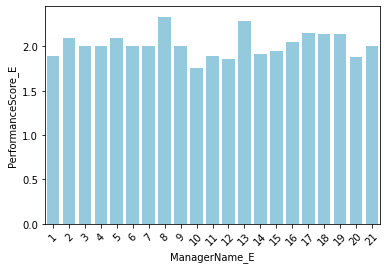

In [111]:
# Create the bar plot
sns.barplot(x='ManagerName_E', y='PerformanceScore_E', data=encoded_df, ci = 0, color = 'skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove lines on top of each bar
ax = plt.gca()

# Show the plot
plt.show()

Though there are highs and lows, visually, there are no apparent disparity between each Managers to performance score.

In [114]:
# Run correlation matrix
encoded_df[['ManagerName_E', 'PerformanceScore_E', 'EmpID']].corr()

,ManagerName_E,PerformanceScore_E,EmpID
ManagerName_E,1.000000,0.002957,0.047830
PerformanceScore_E,0.002957,1.000000,0.690614
EmpID,0.047830,0.690614,1.000000


After running the correlation matrix, we can conclude that Managers play little role in Performance Score, and Employee is a bigger factor that contributes to performance score.

## What is the overall diversity profile of the organization?
<a class="anchor" id="question2"></a>
From the question, I assume that the geographical diversity is requested, and we should display the columns significant to show any geographical properties of the people working for the organization.

[Back To Top](#top)

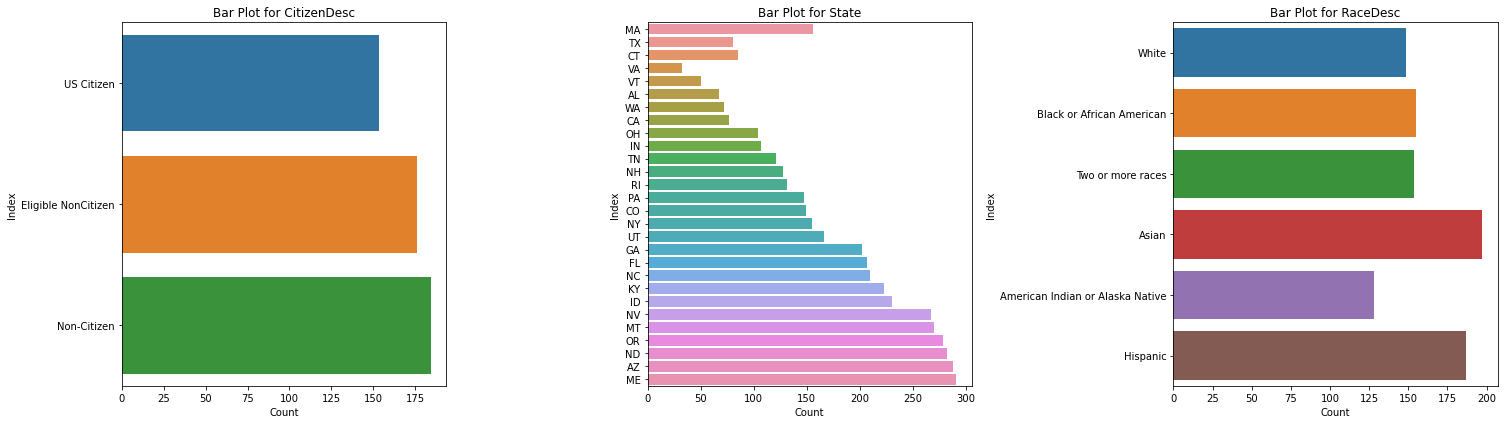

In [121]:
# Plotting different columns
def plot_bar(data, columns):
    num_columns = len(columns)

    # Set up subplots based on the number of columns
    fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 7, 6))

    # Iterate through columns and create bar plots with CI
    for i, col in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes  # Handle single-column case

        sns.barplot(x=data.index, y=col, data=data, ci=None, ax=ax)  # ci=None to disable confidence intervals
        ax.set_title(f'Bar Plot for {col}')
        ax.set_xlabel('Count')
        ax.set_ylabel('Index')

    plt.tight_layout()
    plt.show()
      
plot_bar(df, ['CitizenDesc', 'State', 'RaceDesc'])

## Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this? <a class="anchor" id="question3"></a>
Predicting who will be terminated or not requires numerical data, as we have encoded before. We will use `encoded_df` as an already encoded version of `df` and pass it into ML models.
[Back To Top](#top)

In [124]:
# I wanted to make sure that Termd and TermReason are accurately representing one another
column_mapping(df, 'Termd', 'TermReason')

{0: array(['N/A-StillEmployed'], dtype=object),
 1: array(['career change', 'hours', 'return to school', 'Another position',
        'unhappy', 'attendance', 'performance',
        'Learned that he is a gangster', 'retiring',
        'relocation out of area', 'more money', 'military',
        'no-call, no-show', 'Fatal attraction',
        'maternity leave - did not return', 'medical issues',
        'gross misconduct'], dtype=object)}

In [125]:
# Importing sklearn libaries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [126]:
# This is the models to be used to test the data. Feel free to adjust
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
# Split the data into features (X) and labels (y)
X = encoded_df.drop(columns=['Employee_Name', 'EmpID', 'TermReason_E', 'EmploymentStatus_E'])
y = encoded_df['Termd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store results
results = {'Model': [], 'F1_score': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [128]:
# Pass the models loaded in here. Again, adjust as necessary
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [129]:
# Run the model one by one through loop
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['F1_score'].append(f1)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

C:\Users\sang.yogi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# Print out results
results_df

,Model,F1_score,Accuracy,Precision,Recall
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,Support Vector Machine,0.000000,0.650794,0.000000,0.000000
2,K-Nearest Neighbors,0.300000,0.555556,0.333333,0.272727
3,Logistic Regression,0.222222,0.666667,0.600000,0.136364
4,Decision Tree,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,0.693878,0.761905,0.629630,0.772727
6,AdaBoost,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting,1.000000,1.000000,1.000000,1.000000


With examination of the numerical results, it appears there might be overfitting or issues with the outcomes. This suspicion is highlighted by the majority showing "very accurate" results, contrasted with a few models such as `K-Nearest`, `Logistic Regression`, and `Naive Bayes` exhibiting poor accuracy. Considering the relatively small size of the dataset (311 rows), we will tentatively accept these findings for the time being.

## Are there areas of the company where pay is not equitable? <a class="anchor" id="question4"></a>

For this question, I decided to use 4 columns from `encoded_df` (numerical data):
- `Position_E`
- `Department_E`
- `GenderID`
- `RaceDesc_E`

[Back To Top](#top)

These columns is deemed represent _"areas of the company"_, and will be analyzed against the column `Salary` to see any disparities from visual observation.
### Visual Observation of Disparity

In [148]:
# Group Department with Salary, then use previously made Dictionary to map it into contextual view (also format is changed)
encoded_df.groupby('Department_E')['Salary'].mean().sort_values(ascending=False).rename(index=label_encoders['Department']).map('{:,.0f}'.format)

Department_E
Executive Office        250,000
IT/IS                    97,065
Software Engineering     94,989
Admin Offices            71,792
Sales                    69,061
Production               59,954
Name: Salary, dtype: object

In [149]:
# Group Position with Salary, then use previously made Dictionary to map it into contextual view (also format is changed)
encoded_df.groupby('Position_E')['Salary'].mean().sort_values(ascending=False).rename(index=label_encoders['Position']).map('{:,.0f}'.format)

Position_E
President & CEO                 250,000
CIO                             220,450
Director of Sales               180,000
IT Director                     178,000
Director of Operations          170,500
IT Manager - Infra              157,000
Data Architect                  150,290
IT Manager - DB                 144,960
IT Manager - Support            138,888
Principal Data Architect        120,000
BI Director                     110,929
Database Administrator          108,500
Enterprise Architect            103,613
Sr. Accountant                  102,859
Sr. DBA                         102,234
Software Engineer                96,719
BI Developer                     95,465
Sr. Network Engineer             93,071
Shared Services Manager          93,046
Data Analyst                     89,933
Data Analyst                     88,527
Senior BI Developer              84,803
Software Engineering Manager     77,692
Production Manager               75,294
Sales Manager                

In [150]:
# Group Gender with Salary, then use previously made Dictionary to map it into contextual view (also format is changed)
encoded_df.groupby('GenderID')['Salary'].mean().sort_values(ascending=False).map('{:,.0f}'.format)

GenderID
1    70,629
0    67,787
Name: Salary, dtype: object

In [151]:
# Group Race Description with Salary, then use previously made Dictionary to map it into contextual view (also format is changed)
encoded_df.groupby('RaceDesc_E')['Salary'].mean().sort_values(ascending=False).rename(index=label_encoders['RaceDesc']).map('{:,.0f}'.format)

RaceDesc_E
Hispanic                            83,667
Black or African American           74,431
Asian                               68,521
White                               67,288
American Indian or Alaska Native    65,806
Two or more races                   59,998
Name: Salary, dtype: object

In [152]:
# Try and run correlation matrix
encoded_df[['RaceDesc_E', 'GenderID', 'Position_E', 'Department_E', 'Salary']].corr()

,RaceDesc_E,GenderID,Position_E,Department_E,Salary
RaceDesc_E,1.000000,0.031101,0.053618,-0.000252,-0.089597
GenderID,0.031101,1.000000,-0.093812,0.002271,0.056097
Position_E,0.053618,-0.093812,1.000000,0.096064,-0.184032
Department_E,-0.000252,0.002271,0.096064,1.000000,-0.198331
Salary,-0.089597,0.056097,-0.184032,-0.198331,1.000000


Based on findings from above, there are no apparent disparities of Salary in different groups of each columns. And also there are weak correlation in the matrix above, indicating that they could be playing a small role in `Salary` numbers.

Then, I decided to run ANOVA test for those four columns against `Salary`.

In [ ]:
from scipy.stats import f_oneway

In [163]:
# Making a function to run ANOVA with singular or multiple columns
def test_anova(df, group_columns, value_column):
    """
    Parameters:
    - df: Pandas DataFrame
    - group_columns: Column names to be grouped
    - value_column: Column containing salary information (or other numerical column)
    """
    for gro in group_columns:
        # Group by group_column and extract salary groups
        groups = [group[value_column] for name, group in df.groupby(gro)]
        # Perform one-way ANOVA
        f_statistic, p_value = f_oneway(*groups)
        print(f"Group Column: {gro} with {value_column}")
        print(f"F-statistic: {f_statistic}\nP-value: {p_value}")
        # Print hyphen for separation between outputs
        print("-" * 30)


In [164]:
# Run function for selected columns, against Salary
test_anova(encoded_df, ['RaceDesc_E', 'GenderID', 'Position_E', 'Department_E'], 'Salary')

Group Column: RaceDesc_E with Salary
F-statistic: 1.2863499291564826
P-value: 0.2695646450406796
------------------------------
Group Column: GenderID with Salary
F-statistic: 0.9754391883261777
P-value: 0.3241001178974803
------------------------------
Group Column: Position_E with Salary
F-statistic: 153.84548177486272
P-value: 1.3432601515294733e-156
------------------------------
Group Column: Department_E with Salary
F-statistic: 59.34834401921235
P-value: 4.966770445882221e-43
------------------------------


Assuming that the significance level is 0.05, we can have **Null hypothesis (H0)** and **Alternative Hypothesis (H1)** as follows:
- `H0`: There are no significant differences in `Salary` among different groups in `[selected column(s)]`.
- `H1`: There are significant differences in `Salary` among different groups in `[selected column(s)]`.

Based on ANOVA test above, we can conclude that:
- `RaceDesc`: With a p-value of 0.26 and a significance level of 0.05, fail to reject the null hypothesis. There is not enough evidence to suggest that there are significant differences in salary among different racial groups.
- `Gender`: Similarly, with a p-value of 0.32, we fail to reject the null hypothesis for gender. There is not enough evidence to suggest that there are significant differences in salary based on gender.
- `Position`: The p-value of 1.34 is unusually high and might indicate a potential issue. P-values should typically be between 0 and 1. This result may suggest a problem with the statistical analysis or data.
- `Department`: With a p-value of 4.96, again, there seems to be an issue. Similar to the position, this result is not within the standard range of 0 to 1 for p-values.

To my interpretation, the absurdly high p-values could be coming from factors such as:
- As the number of groups increases, the likelihood of finding a significant result by chance (Type I error) also increases. This is known as the problem of multiple comparisons.
- With a larger number of groups, we need a larger sample size to achieve the same level of statistical power (ability to detect a true effect if it exists). In this case, we only have 311 rows of data.
- Having many groups can make it challenging to interpret the overall pattern of differences, especially if there is no clear hypothesis about which specific groups are expected to differ.

## What are our best recruiting sources if we want to ensure a diverse organization <a class="anchor" id="question5"></a>

[Back To Top](#top)

For this question, I decided to use information from these columns from `df` (textual data):
- `RecruitmentSource`
- `FromDiversityJobFairID`
- `GenderID`
- `RaceDesc`

Assuming that being 'diverse' is a cultural standpoint, these columns will be analyzed to see recruitment profiles. (Feel free to change it)

In [166]:
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

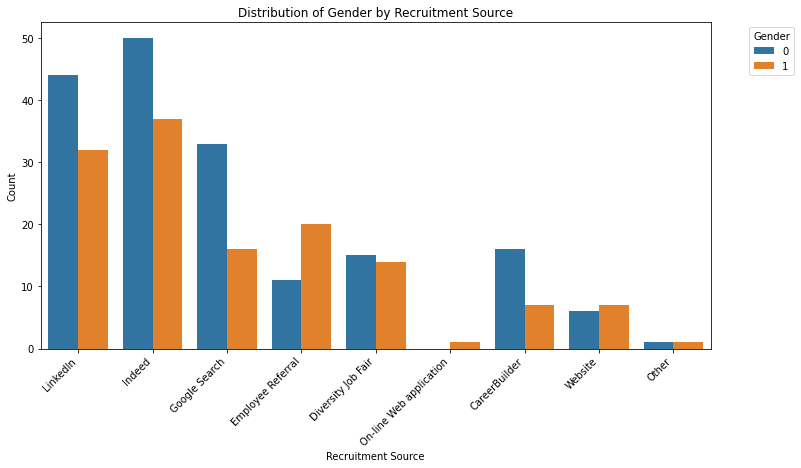

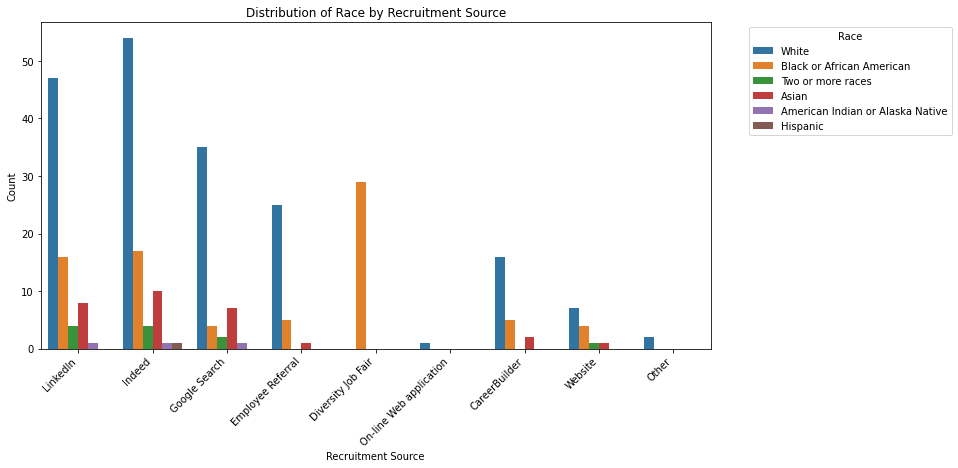

In [169]:
# Plot the distribution of Gender by Recruitment Source
plt.figure(figsize=(12, 6))
sns.countplot(x='RecruitmentSource', hue='GenderID', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Gender by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the distribution of Race by Recruitment Source
plt.figure(figsize=(12, 6))
sns.countplot(x='RecruitmentSource', hue='RaceDesc', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Race by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the two graphs we can already see that certain Recruitment Sources have contributed to more diverse organization, notably `LinkedIn`, `Indeed`, and `Google Search`. And based on `GenderID`, we know that `LinkedIn` and `Indeed` is the highest sources of gaining new people.

Thank you for taking the time to view this notebook! Hope this inspires you.